In [1]:
import pandas as pd #data manipulation
import numpy as np #calculus and algebra
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import stats
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
passenger_movement_df = pd.read_csv('TRBM1.20240317134742.csv') #Loading the CSV file into a pandas DF

# EDA

In [3]:
passenger_movement_df.head(30) #First 30 rows 

,STATISTIC,STATISTIC Label,TLIST(M1),Month,DIRECT,Direction,TYPASS,Type of Passenger Movement,UNIT,VALUE
0,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,1,Passenger Movement by Sea to All Countries,Number,20102.0
1,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,11,Passenger Movement by Sea to Great Britain,Number,19963.0
2,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,12,Passenger Movement by Sea to Countries Other T...,Number,139.0
3,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,2,Passenger Movement Cross-Border Rail,Number,10344.0
4,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,3,Passenger Movement Cross-Border Bus,Number,40063.0
5,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,4,Passenger Movement by Air from All Airports,Number,18098.0
6,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,41,Passenger Movement by Air from Dublin Airport,Number,16762.0
7,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,42,Passenger Movement by Air from Cork Airport,Number,0.0
8,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,43,Passenger Movement by Air from Shannon Airport,Number,1336.0
9,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,431,Passenger Movement by Air from Shannon Airport...,Number,747.0


In [4]:
passenger_movement_df.shape #12936 rows, 10 columns

(12936, 10)

In [5]:
#Renaming columns intuitively
passenger_movement_df = passenger_movement_df.rename(columns={'TLIST(M1)': 'Year' })

In [6]:
passenger_movement_df.dtypes 
#value has no incorrectly inputted values (such as numbers inputted as words), all floats

STATISTIC                      object
STATISTIC Label                object
Year                            int64
Month                          object
DIRECT                          int64
Direction                      object
TYPASS                          int64
Type of Passenger Movement     object
UNIT                           object
VALUE                         float64
dtype: object

In [7]:
passenger_movement_df.count() #VALUE column missing two values

STATISTIC                     12936
STATISTIC Label               12936
Year                          12936
Month                         12936
DIRECT                        12936
Direction                     12936
TYPASS                        12936
Type of Passenger Movement    12936
UNIT                          12936
VALUE                         12934
dtype: int64

In [8]:
passenger_movement_df = passenger_movement_df.drop(["STATISTIC Label", "TYPASS", "UNIT", "DIRECT", "STATISTIC","Month"], axis=1)
#removing columns which aren't needed/contain the same info
#going to keep the two year-month columns as the original form will be used later on in ML section
#copied

In [9]:
ascending_passenger_movement_df = passenger_movement_df.sort_values(by='VALUE', ascending=False) #Year with the most movement
ascending_passenger_movement_df 

,Year,Direction,Type of Passenger Movement,VALUE
12567,200808,Arriving in Eire,Passenger Movement by Air from All Airports,1603381.0
12303,200708,Arriving in Eire,Passenger Movement by Air from All Airports,1575955.0
12281,200707,Arriving in Eire,Passenger Movement by Air from All Airports,1565640.0
12545,200807,Arriving in Eire,Passenger Movement by Air from All Airports,1555437.0
12292,200707,Departing Eire,Passenger Movement by Air from All Airports,1555235.0
...,...,...,...,...
161,196108,Arriving in Eire,Passenger Movement by Air from Cork Airport,0.0
2675,197102,Departing Eire,Passenger Movement by Sea to Countries Other T...,0.0
2631,197012,Departing Eire,Passenger Movement by Sea to Countries Other T...,0.0
12126,200612,Arriving in Eire,Passenger Movement Cross-Border Bus,NaN


In [10]:
#Checking for duplicates
duplicate_rows_df = passenger_movement_df[passenger_movement_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
#no duplicated data

number of duplicate rows:  (0, 4)


In [11]:
passenger_movement_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        12936 non-null  int64  
 1   Direction                   12936 non-null  object 
 2   Type of Passenger Movement  12936 non-null  object 
 3   VALUE                       12934 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 404.4+ KB


In [12]:
print(passenger_movement_df.isnull().values.any()) #Checking for null values

True


In [13]:
print(passenger_movement_df.isnull().sum()) #two null values

Year                          0
Direction                     0
Type of Passenger Movement    0
VALUE                         2
dtype: int64


In [14]:
passenger_movement_df.dropna(axis=0,inplace=True) #dropping the two rows with null values

In [15]:
passenger_movement_df.shape #two rows have been dropped

(12934, 4)

In [16]:
#function to convert imported year to a decimal for graphing
def year_month_to_decimal(year_month):
    
    year = int(year_month[:4])
    month = int(year_month[4:])
    decimal_month = month / 12.0
    return year + decimal_month

In [17]:
#applying the function to the year 
passenger_movement_df['Year'] = passenger_movement_df['Year'].astype(str)
passenger_movement_df['decimal_year'] = passenger_movement_df['Year'].apply(year_month_to_decimal)
passenger_movement_df['decimal_year'] = passenger_movement_df['decimal_year'].astype(float)
passenger_movement_df

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333
1,196101,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333
2,196101,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333
...,...,...,...,...,...
12931,200912,Departing Eire,Passenger Movement by Air from Dublin Airport,664962.0,2010.000000
12932,200912,Departing Eire,Passenger Movement by Air from Cork Airport,76086.0,2010.000000
12933,200912,Departing Eire,Passenger Movement by Air from Shannon Airport,61229.0,2010.000000
12934,200912,Departing Eire,Passenger Movement by Air from Shannon Airport...,50767.0,2010.000000


In [18]:
passenger_movement_df["Direction"].unique() #two unique values

array(['Arriving in Eire', 'Departing Eire'], dtype=object)

In [19]:
passenger_movement_df["Type of Passenger Movement"].unique() #11 unique columns

array(['Passenger Movement by Sea to All Countries',
       'Passenger Movement by Sea to Great Britain',
       'Passenger Movement by Sea to Countries Other Than Great Britain',
       'Passenger Movement Cross-Border Rail',
       'Passenger Movement Cross-Border Bus',
       'Passenger Movement by Air from All Airports',
       'Passenger Movement by Air from Dublin Airport',
       'Passenger Movement by Air from Cork Airport',
       'Passenger Movement by Air from Shannon Airport',
       'Passenger Movement by Air from Shannon Airport (Eastbound)',
       'Passenger Movement by Air from Shannon Airport (Westbound)'],
      dtype=object)

In [20]:
passenger_movement_df.describe() #mean and std indicate the data is heavily skewed

,VALUE,decimal_year
count,1.293400e+04,12934.000000
mean,9.242068e+04,1985.538349
std,1.769196e+05,14.144184
min,0.000000e+00,1961.083333
25%,1.340125e+04,1973.270833
50%,3.542900e+04,1985.500000
75%,8.617450e+04,1997.750000
max,1.603381e+06,2010.000000


In [21]:
passenger_movement_df.describe(include="object") 

,Year,Direction,Type of Passenger Movement
count,12934,12934,12934
unique,588,2,11
top,196101,Arriving in Eire,Passenger Movement by Sea to All Countries
freq,22,6467,1176


In [22]:
def season(x):
    month = int(str(x)[-2:])
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
passenger_movement_df['Season'] =  passenger_movement_df['Year'].apply(season)

In [23]:
#Splitting data into two data frames: arriving into Ireland and departing from Ireland, making sure to not double count

options =['Passenger Movement by Sea to All Countries', 'Passenger Movement Cross-Border Rail', 'Passenger Movement Cross-Border Bus', 'Passenger Movement by Air from All Airports']
#ensure values aren't being double counted

passenger_movement_net_df = passenger_movement_df[passenger_movement_df['Type of Passenger Movement'].isin(options)]

arriving_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Arriving in Eire'])]
arriving_net_df = arriving_df[arriving_df['Type of Passenger Movement'].isin(options)]

departing_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Departing Eire'])]
departing_net_df = departing_df[departing_df['Type of Passenger Movement'].isin(options)]

# Visualisations

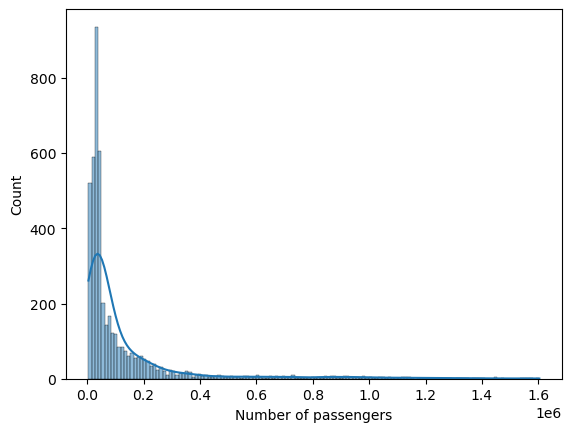

In [24]:
sns.histplot(data=passenger_movement_net_df, x="VALUE", kde = True)
plt.xlabel('Number of passengers')
plt.ylabel('Count')
plt.savefig('hist')

Text(0.5, 1.0, 'Boxplot')

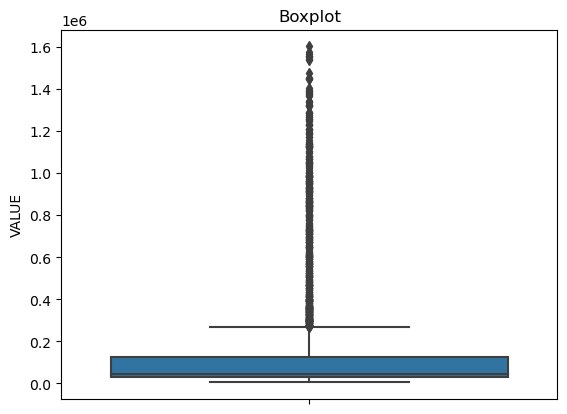

In [25]:
sns.boxplot(y = 'VALUE', data = passenger_movement_net_df) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise
plt.title('Boxplot')

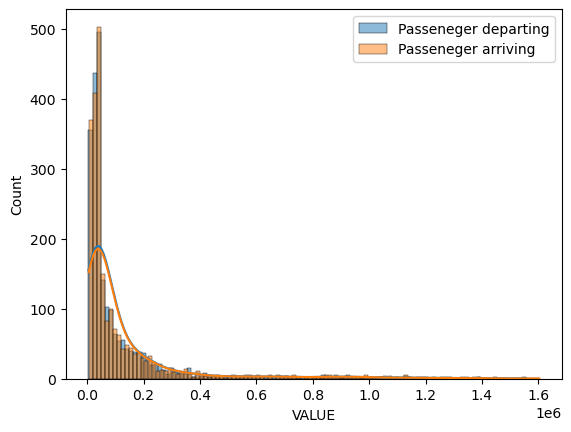

In [26]:
sns.histplot(data=departing_net_df, x="VALUE", kde = True, label='Passeneger departing')
sns.histplot(data=arriving_net_df, x="VALUE", kde = True, label='Passeneger arriving')
plt.legend(loc='upper right')

In [27]:
arriving_by_air_df = arriving_net_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]  
arriving_by_sea_df = arriving_net_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]
departing_by_air_df = departing_net_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]
departing_by_sea_df = departing_net_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]

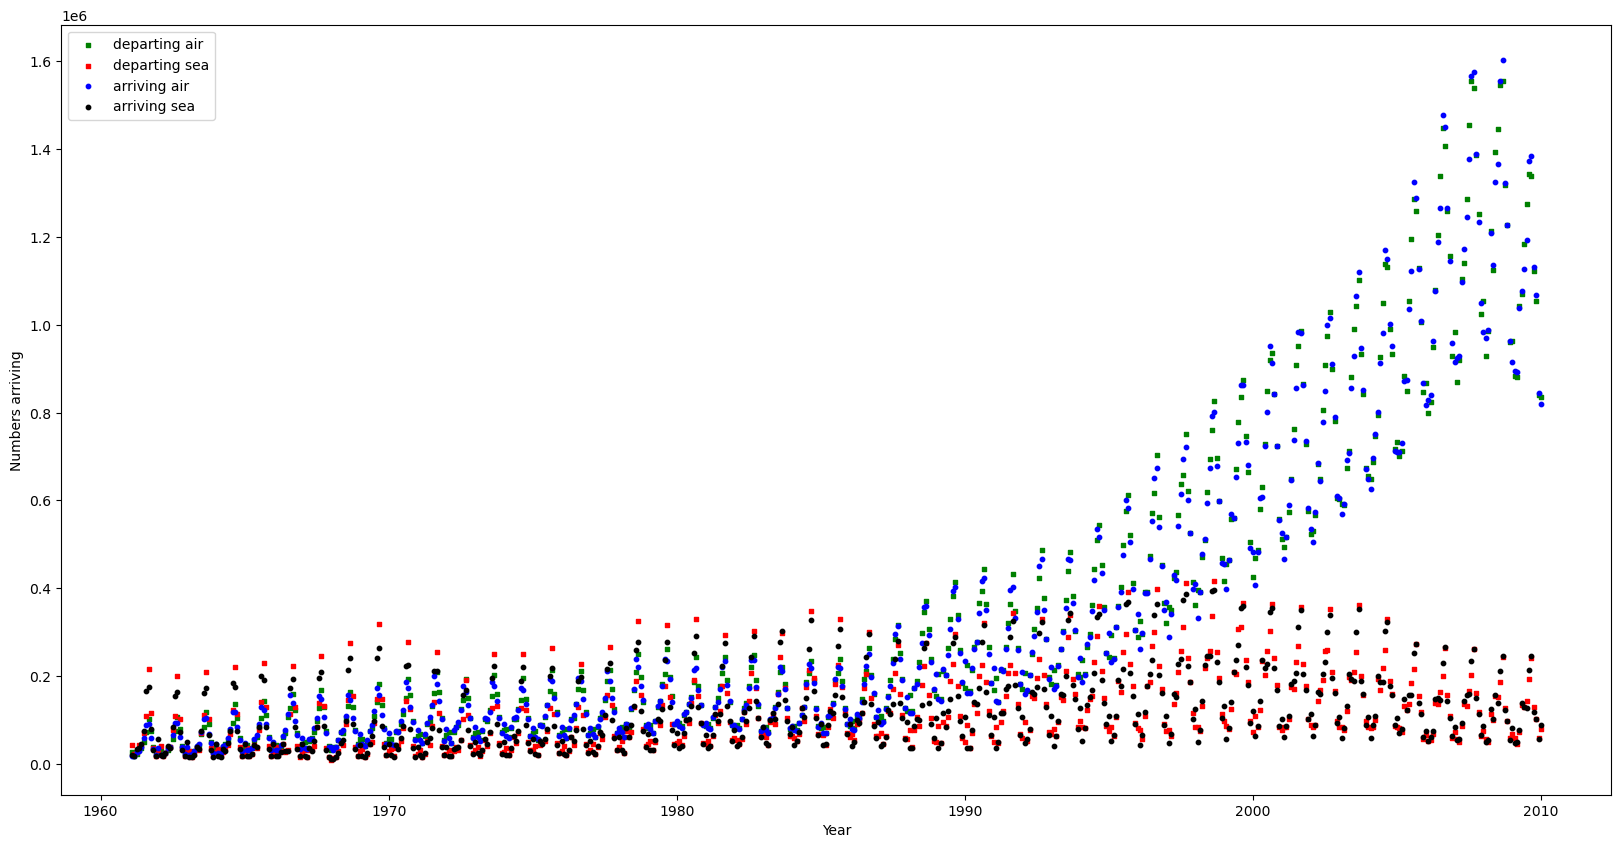

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(departing_by_air_df["decimal_year"], departing_by_air_df["VALUE"], s=10, c='green', marker="s", label='departing air')
ax.scatter(departing_by_sea_df["decimal_year"],departing_by_sea_df["VALUE"],s=10, c='red', marker="s", label='departing sea')
ax.scatter(arriving_by_air_df["decimal_year"], arriving_by_air_df["VALUE"], s=10, c='blue', marker="o", label='arriving air')
ax.scatter(arriving_by_sea_df["decimal_year"], arriving_by_sea_df["VALUE"], s=10, c='black', marker="o", label='arriving sea')
plt.legend(loc='upper left')
ax.set_xlabel("Year")
ax.set_ylabel("Numbers arriving")
plt.savefig('scatter')
plt.show()

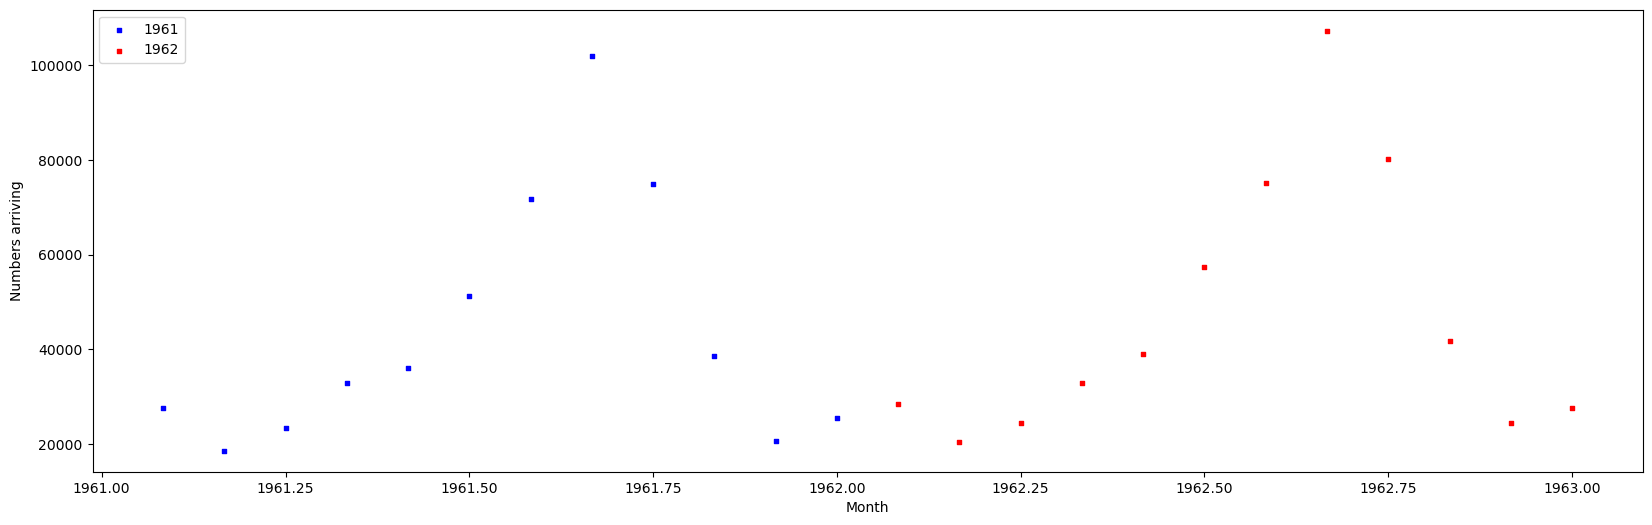

In [29]:
#look at a plot of one year - normally distributed?
departing_by_air_1961_df = departing_by_air_df[departing_by_air_df['Year'].str.contains('1961')]
departing_by_air_1962_df = departing_by_air_df[departing_by_air_df['Year'].str.contains('1962')]
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(departing_by_air_1961_df["decimal_year"], departing_by_air_1961_df["VALUE"], s=10, c='b', marker="s", label='1961')
ax.scatter(departing_by_air_1962_df["decimal_year"], departing_by_air_1962_df["VALUE"], s=10, c='r', marker="s", label='1962')
plt.legend(loc='upper left')
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show() 

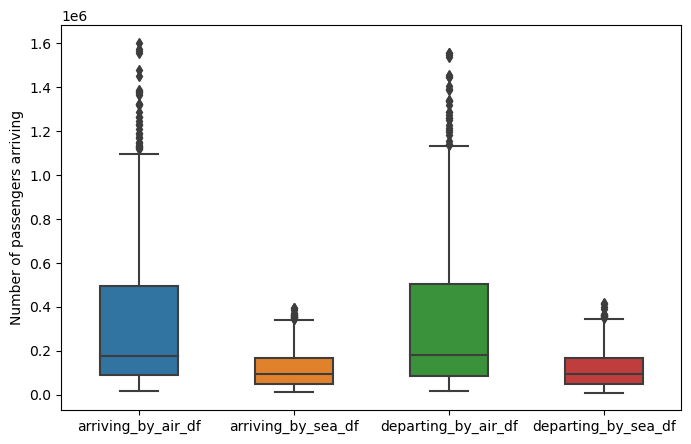

In [30]:
arriving_by_air_df['Dataset'] = 'arriving_by_air_df'
arriving_by_sea_df['Dataset'] = 'arriving_by_sea_df'
departing_by_sea_df['Dataset'] = 'departing_by_sea_df'
departing_by_air_df['Dataset'] = 'departing_by_air_df'
all_data = pd.concat([arriving_by_air_df, arriving_by_sea_df, departing_by_air_df, departing_by_sea_df])
plt.figure(figsize=(8, 5)) 
sns.boxplot(x='Dataset', y='VALUE', data=all_data, width=0.5)
plt.title('') 
plt.xlabel('')  
plt.ylabel('Number of passengers arriving')  
plt.savefig('boxplot')
plt.show()

In [31]:
print(arriving_by_air_df.describe())
print(arriving_by_sea_df.describe())

              VALUE  decimal_year
count  5.880000e+02    588.000000
mean   3.413003e+05   1985.541667
std    3.579344e+05     14.157105
min    1.725000e+04   1961.083333
25%    8.918600e+04   1973.312500
50%    1.771845e+05   1985.541667
75%    4.945732e+05   1997.770833
max    1.603381e+06   2010.000000
               VALUE  decimal_year
count     588.000000    588.000000
mean   118646.709184   1985.541667
std     86918.855434     14.157105
min     10712.000000   1961.083333
25%     49729.000000   1973.312500
50%     93685.000000   1985.541667
75%    166887.750000   1997.770833
max    395819.000000   2010.000000


# Statistics

## Binomial Distribution

In [32]:
from scipy.stats import binom
#numbers arriving by departing by sea relatively stable over time - probability will be more constant than air travel
total_departing_by_sea = departing_by_sea_df['VALUE'].sum()
total_arriving_by_sea = arriving_by_sea_df['VALUE'].sum()
total_sea_df = passenger_movement_df[passenger_movement_df['Type of Passenger Movement'] == 'Passenger Movement by Sea to All Countries'] 

# Sum the values in 'column_to_sum' from the filtered DataFrame
total_movement_sea = total_sea_df['VALUE'].sum()
print(total_departing_by_sea, total_arriving_by_sea, total_movement_sea)

69555589.0 69764265.0 139319854.0


In [33]:
p = total_departing_by_sea/total_movement_sea 
q = total_arriving_by_sea/total_movement_sea
print(p,q)

0.49925109022867625 0.5007489097713238


In [34]:
p + q == 1 #checking the two probabilities sum to 1

True

In [35]:
#if xx number of people are chosen at random who arrived by sea what is the probability they were entering or leaving the country?
#binom.pmf(k = number that you want, n = sample size or limit, p = probability)
binom.pmf(5, 10, p)
#there is a probability of 0.246 that exactly 5 out of 10 people were departing the country by sea from 1961 to 2009

0.24609098950080252

In [36]:
binom.cdf(5, 10, p) #less than 5 (4 or less) departing

0.6248885093777816

In [37]:
binom.sf(5, 10, p) #more than 5 (4 or more) departing

0.3751114906222183

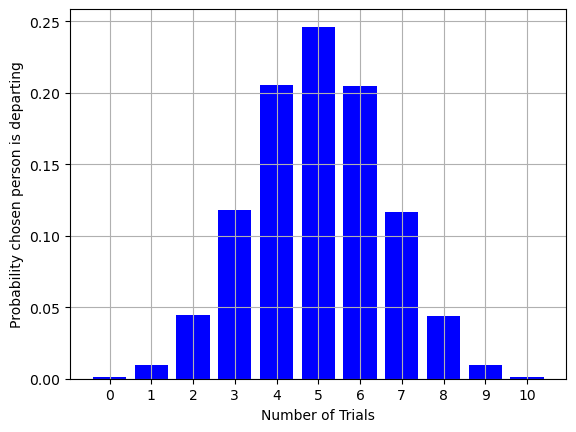

In [38]:
n = 10  # Number of trials

# Generate x values (number of successes)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
probabilities = binom.pmf(x_values, n, p)

# Plot the binomial distribution
plt.bar(x_values, probabilities, color='blue')
plt.xlabel('Number of Trials')
plt.ylabel('Probability chosen person is departing')
plt.xticks(x_values)
plt.grid(True)
plt.show()

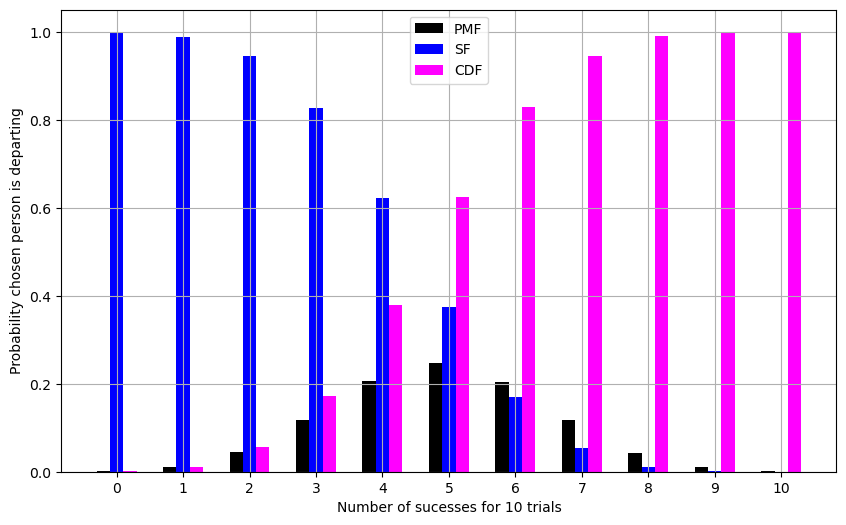

In [39]:
n = 10
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
probabilities_pmf = binom.pmf(x_values, n, p)
probabilities_sf = binom.sf(x_values, n, p)
probabilities_cdf = binom.cdf(x_values, n, p)

# Plot the binomial distributions
plt.figure(figsize=(10, 6))

# Plot PMF
plt.bar(x_values - 0.2, probabilities_pmf, width=0.2, color='black', label='PMF')

# Plot SF
plt.bar(x_values, probabilities_sf, width=0.2, color='blue', label='SF')

# Plot CDF
plt.bar(x_values + 0.2, probabilities_cdf, width=0.2, color='magenta', label='CDF')

plt.xlabel('Number of sucesses for 10 trials')
plt.ylabel('Probability chosen person is departing')
plt.xticks(x_values)
plt.legend()
plt.grid(True)
plt.savefig('binomial')
plt.show()

In [40]:
#Two probabilities are approx equal
#Expected value over the long run that 10 people would be departing
n = 10
expected_value = 10*p
expected_value

4.992510902286763

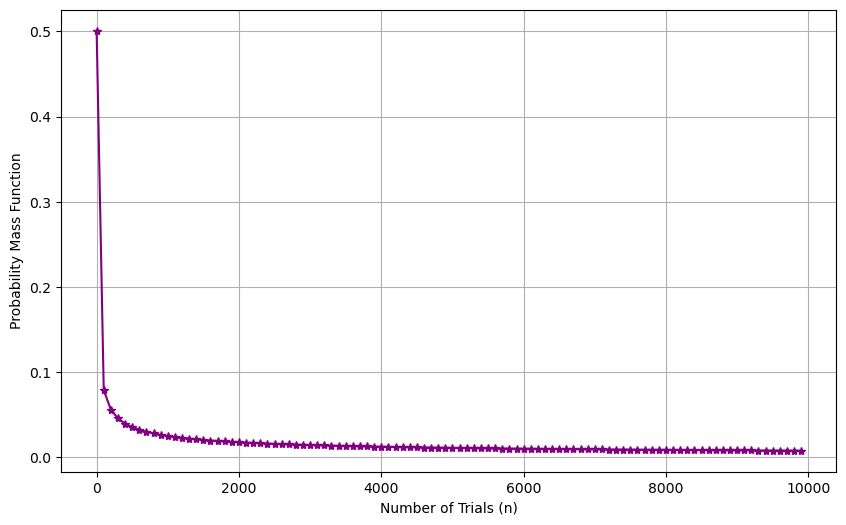

In [41]:
#initialise 
n_values = []
k_values = []
pmf_values = []

for i in range(1, 10000, 100):  
    n = i
    k = i // 2  # Set k to half of n
    pmf = binom.pmf(k, n, p)
    
    n_values.append(n) #add values to list
    k_values.append(k)
    pmf_values.append(pmf)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, pmf_values, marker='*', linestyle='-', color = 'purple')
plt.xlabel('Number of Trials (n)')
plt.ylabel('Probability Mass Function')
plt.grid(True)
plt.savefig('binomial large number of trails')
plt.show()

## Poisson Distribution

In [42]:
#finding the average number of people moving by by sea
from scipy.stats import poisson
total_number_of_months = len(departing_by_sea_df)
lambda_poisson_daily= (total_departing_by_sea + total_arriving_by_sea)/(total_number_of_months*365)#per day
lambda_poisson_daily #avergae number of people coming a day

649.1466498928338

In [43]:
k = round(lambda_poisson_daily)
poisson.pmf(k, lambda_poisson_daily)

0.01565758428655263

In [44]:
poisson.sf(k, lambda_poisson_daily)

0.49185836070889655

In [45]:
poisson.cdf(k, lambda_poisson_daily)

0.5081416392911033

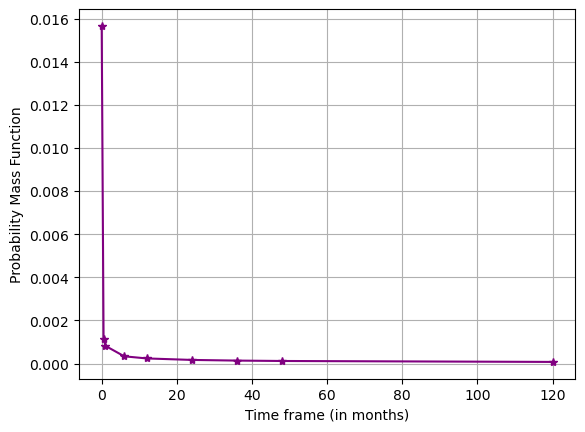

In [46]:
lambda_poisson_values = []
pmf_values = []
lambda_poisson = (total_departing_by_sea + total_arriving_by_sea) / total_number_of_months #base units = per month
time_scale = [1/365, 0.5, 1, 6, 12, 24, 36, 48, 120]

for time in time_scale:
    lambda_poisson_i = lambda_poisson * time
    k = round(lambda_poisson_i)
    pmf = poisson.pmf(k, lambda_poisson_i)  # Calculate PMF for lambda_poisson_i
    # Add values to list for each iteration
    lambda_poisson_values.append(lambda_poisson_i)
    pmf_values.append(pmf)

# Plot the results
plt.plot(time_scale, pmf_values, marker='*', linestyle='-', color = 'purple')

plt.xlabel('Time frame (in months)')
plt.ylabel('Probability Mass Function')
#plt.legend()
plt.grid(True)
plt.savefig('large_poisson.png')
plt.show()

# Normal Distribuiton

<Axes: xlabel='VALUE', ylabel='Count'>

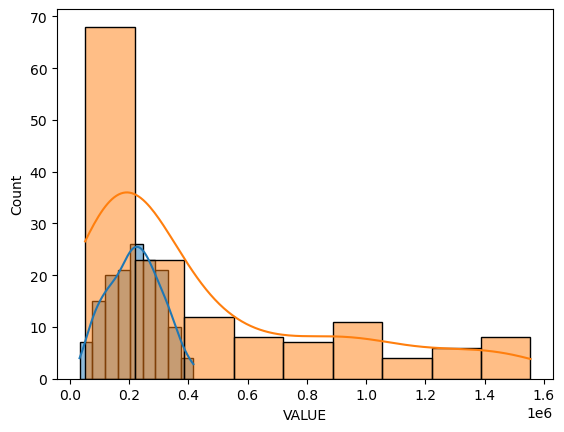

In [47]:
departing_by_sea_summer_df = departing_by_sea_df[departing_by_sea_df['Season'].str.contains('Summer')]
departing_by_air_summer_df = departing_by_air_df[departing_by_air_df['Season'].str.contains('Summer') ]
sns.histplot(data=departing_by_sea_summer_df, x="VALUE", kde = True)
sns.histplot(data=departing_by_air_summer_df, x="VALUE", kde = True)

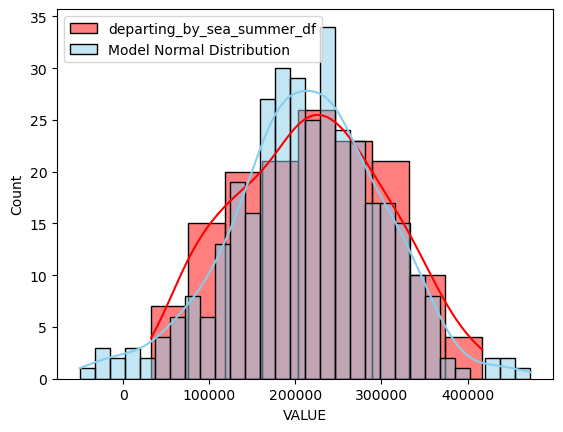

In [48]:
sns.histplot(data=departing_by_sea_summer_df, color='red', x="VALUE", kde = True, label='departing_by_sea_summer_df') 
data = np.random.normal(loc=217441.510204, scale=87330.674017, size=350)
sns.histplot(data, kde=True, color='skyblue', bins=30, label='Model Normal Distribution')
plt.legend(loc='upper left')
# Plot the normal distribution curve
plt.savefig('approx norm')
plt.show()

In [49]:
departing_by_sea_summer_df.describe()

,VALUE,decimal_year
count,147.000000,147.000000
mean,217441.510204,1985.583333
std,87330.674017,14.190649
min,32517.000000,1961.500000
25%,144680.500000,1973.541667
50%,218386.000000,1985.583333
75%,275698.000000,1997.625000
max,416886.000000,2009.666667


In [50]:
norm_dist = departing_by_sea_summer_df.describe()
mu = norm_dist.iloc[1, 0]
sigma = norm_dist.iloc[2, 0]
print(mu, sigma)

217441.51020408163 87330.67401677495


In [51]:
norm.sf(200000, mu, sigma)

0.5791494441612952

In [52]:
norm.cdf(200000, mu, sigma)

0.42085055583870473

In [53]:
norm.cdf(200000, mu, sigma) + norm.sf(200000, mu, sigma) 

1.0

In [54]:
upper = mu+2*sigma
lower = mu-2*sigma
print(upper, lower) #95% probability that between the upper and lower limit will leave via sea during the summer months

392102.8582376315 42780.16217053172


# Encoding

In [55]:
passenger_movement_net_df

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333,Winter
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333,Winter
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333,Winter
5,196101,Arriving in Eire,Passenger Movement by Air from All Airports,18098.0,1961.083333,Winter
11,196101,Departing Eire,Passenger Movement by Sea to All Countries,44076.0,1961.083333,Winter
...,...,...,...,...,...,...
12919,200912,Arriving in Eire,Passenger Movement by Air from All Airports,818525.0,2010.000000,Winter
12925,200912,Departing Eire,Passenger Movement by Sea to All Countries,79667.0,2010.000000,Winter
12928,200912,Departing Eire,Passenger Movement Cross-Border Rail,38111.0,2010.000000,Winter
12929,200912,Departing Eire,Passenger Movement Cross-Border Bus,33924.0,2010.000000,Winter


In [56]:
print(passenger_movement_net_df.isnull().sum())

Year                          0
Direction                     0
Type of Passenger Movement    0
VALUE                         0
decimal_year                  0
Season                        0
dtype: int64


In [57]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
#Season, direction, Type of Passenger Movement need to be encoded
passenger_movement_net_df['Year'] = passenger_movement_df['Year'].astype(float) #changing Year to float so it won't be encoded

def encode_label(dataFrame): #function to encode any dataframe
    encoded_df = dataFrame.copy()
    for column in encoded_df.columns:
        if encoded_df[column].dtype == 'object': #only encodes objects
            encoded_df[column] = lencoder.fit_transform(encoded_df[column]) #need to try a few types of encoding
    return encoded_df

In [93]:
#One Hot Encoder - loop not working, extra rows being adde
from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(sparse_output = False)
#Season, direction, Type of Passenger Movement need to be encoded
#passenger_movement_net_df['Year'] = passenger_movement_df['Year'].astype(float) #changing Year to float so it won't be encoded

# def encode_one_hot(data_frame):
#     encoded_df = data_frame.copy() #creating copy so original dataframe remains the same
#     new_columns = [] # List to store names of new columns
    
#     for column in encoded_df.columns: #looping through the columns
#         if encoded_df[column].dtype == 'object': #only encodes objects not floats
#             encoder = OneHotEncoder(sparse=False) #creating one hot encoder for each column
#             column_encoded = encoder.fit_transform(encoded_df[[column]]) #transforming categorical to numerical data
#             column_encoded_df = pd.DataFrame(column_encoded, columns=encoder.get_feature_names_out([column])) #naming the encoded column            
#             new_columns.extend(column_encoded_df.columns) # Add the new column names to the list
#             encoded_df = pd.concat([encoded_df, column_encoded_df], axis=1) #adding the new column to the dataframe
#             encoded_df.drop(column, axis=1, inplace=True) #dropping original column
            
#     return encoded_df[new_columns] # Return only the new columns= False)
    

In [220]:
passenger_movement_net_df_encoded_label = encode_label(passenger_movement_net_df)
#passenger_movement_net_df_one_hot_encoded = encode_one_hot(passenger_movement_net_df)

#Loop not working, doing manually for the moment
onehotencoder = OneHotEncoder(sparse_output = False, drop = 'first')
passenger_movement_net_df_data_1 = onehotencoder.fit_transform([passenger_movement_net_df["Direction"]])
passenger_movement_net_df_one_hot_encoded_1 = pd.get_dummies(passenger_movement_net_df, columns=["Direction"],sparse = True)

passenger_movement_net_df_data_2 = onehotencoder.fit_transform([passenger_movement_net_df_one_hot_encoded_1["Type of Passenger Movement"]])
passenger_movement_net_df_one_hot_encoded_2 = pd.get_dummies(passenger_movement_net_df_one_hot_encoded_1, columns=["Type of Passenger Movement"],sparse = True)

passenger_movement_net_df_data_3 = onehotencoder.fit_transform([passenger_movement_net_df_one_hot_encoded_2["Season"]])
passenger_movement_net_df_one_hot_encoded_3 = pd.get_dummies(passenger_movement_net_df_one_hot_encoded_2, columns=["Season"],sparse = True)

# Scaling 

In [221]:
max_value = passenger_movement_net_df['VALUE'].max()
min_value = passenger_movement_net_df['VALUE'].min()
print(min_value, max_value)

4815.0 1603381.0


In [242]:
import sklearn.preprocessing as preproc # data is skewed, minmax used
passenger_movement_net_df_encoded_onehot_scaled_minmax = passenger_movement_net_df_one_hot_encoded_3.copy() #create copy of encoded dataframe
passenger_movement_net_df_encoded_onehot_scaled_minmax['VALUE'] = preproc.minmax_scale(passenger_movement_net_df_encoded_scaled_minmax['VALUE']) #only VALUE needs to be scaled

passenger_movement_net_df_encoded_label_scaled_minmax = passenger_movement_net_df_encoded_label.copy() #create copy of encoded dataframe
passenger_movement_net_df_encoded_label_scaled_minmax['VALUE'] = preproc.minmax_scale(passenger_movement_net_df_encoded_label_scaled_minmax['VALUE']) #only VALUE needs to be scaled


passenger_movement_net_df_encoded_onehot_scaled_standard = passenger_movement_net_df_one_hot_encoded_3.copy()
passenger_movement_net_df_encoded_onehot_scaled_standard['VALUE'] = preproc.StandardScaler().fit_transform(passenger_movement_net_df_encoded_scaled_standard[['VALUE']])


passenger_movement_net_df_encoded_onehot_scaled_l2 = passenger_movement_net_df_one_hot_encoded_3.copy()
passenger_movement_net_df_encoded_onehot_scaled_l2['VALUE'] = preproc.normalize(passenger_movement_net_df_encoded_scaled_l2[['VALUE']])

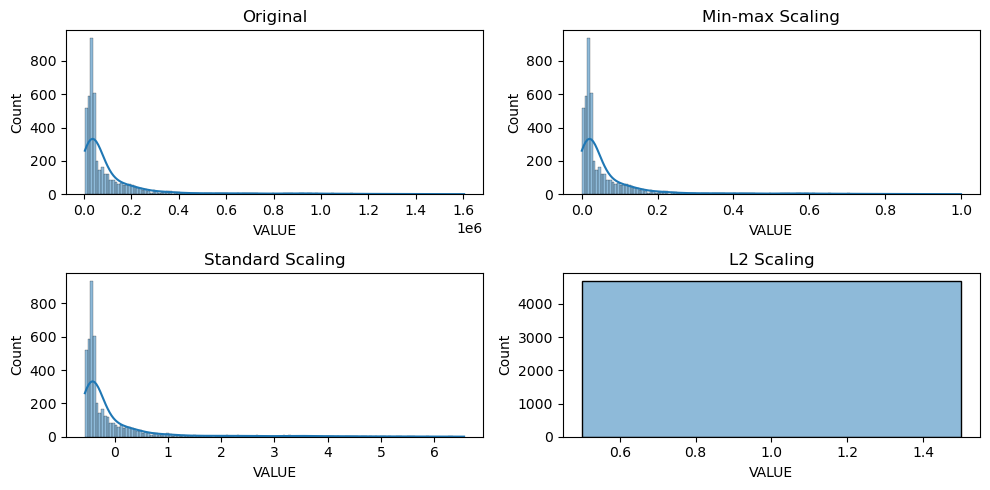

In [243]:
fig, axs = plt.subplots(2,2,  figsize=(10, 5))

# Plot the first histogram on the first subplot using Seaborn
sns.histplot(data=passenger_movement_net_df, x="VALUE", kde = True, ax=axs[0,0])
axs[0,0].set_title('Original')

# Plot the second histogram on the second subplot using Seaborn
sns.histplot(data=passenger_movement_net_df_encoded_scaled_minmax, x="VALUE", kde = True, ax=axs[0,1])
axs[0,1].set_title('Min-max Scaling')

# Plot the second histogram on the second subplot using Seaborn
sns.histplot(data=passenger_movement_net_df_encoded_onehot_scaled_standard, x="VALUE", kde = True, ax=axs[1,0])
axs[1,0].set_title('Standard Scaling')

# Plot the second histogram on the second subplot using Seaborn
sns.histplot(data=passenger_movement_net_df_encoded_onehot_scaled_l2, x="VALUE", kde = True, ax=axs[1,1])
axs[1,1].set_title('L2 Scaling')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('scaling comp')
# Show the plot
plt.show()


# Machine Learning

## KNN

In [268]:
passenger_movement_net_df_encoded_label_scaled_minmax.iloc[:,:]

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101.0,0,3,0.009563,1961.083333,3
3,196101.0,0,1,0.003459,1961.083333,3
4,196101.0,0,0,0.022050,1961.083333,3
5,196101.0,0,2,0.008309,1961.083333,3
11,196101.0,1,3,0.024560,1961.083333,3
...,...,...,...,...,...,...
12919,200912.0,0,2,0.509025,2010.000000,3
12925,200912.0,1,3,0.046824,2010.000000,3
12928,200912.0,1,1,0.020829,2010.000000,3
12929,200912.0,1,0,0.018209,2010.000000,3


In [274]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 100)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors)) 

from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(passenger_movement_net_df_encoded_label_scaled_minmax.iloc[:, 2:6], #the test 
                                                                 passenger_movement_net_df_encoded_label_scaled_minmax.iloc[:,1], test_size=0.7, random_state=42)
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((1410, 4), (1410,), (3292, 4), (3292,))

In [275]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)      # Save the score value in the train_accuracy array

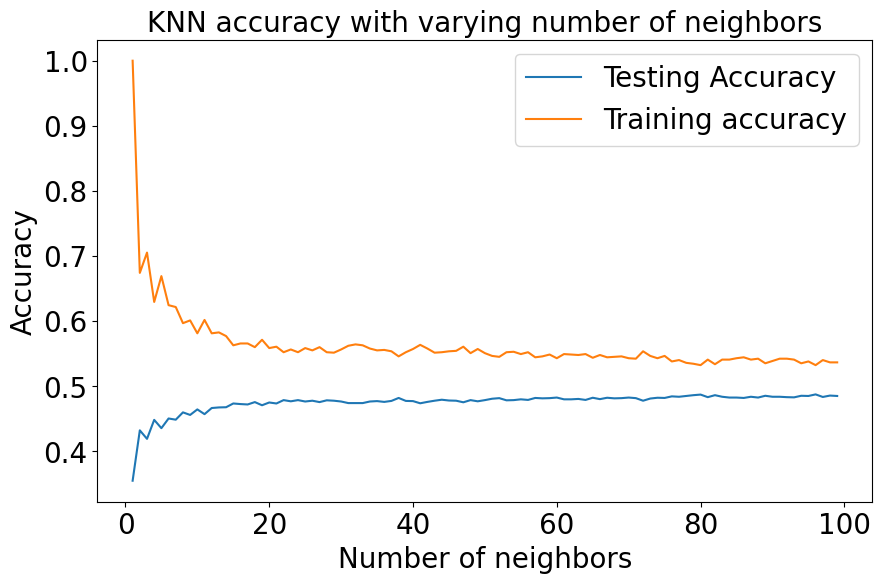

In [276]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [277]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 80)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)
# Display the test accuracy
print(test_accuracy)

0.4866342648845686


In [278]:
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(test_data)

# Display the confusion matrix - 
confusion_matrix(test_label, prediction)

array([[749, 913],
       [777, 853]])

In [266]:
# import the library classification_report
from sklearn.metrics import classification_report

# Display the report
print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       710
           1       0.42      0.36      0.39       701

    accuracy                           0.44      1411
   macro avg       0.44      0.44      0.43      1411
weighted avg       0.44      0.44      0.43      1411

